In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read in data and display fist 5 rows
df = pd.read_csv('TIME SERIES + TRIPADVISORS INDEX + ECONOMIC INDEX - DATA COMPOSITION 1 (70-15-15).csv')
df.head(5)

,Month,Tourist Arrival,Number of Posts,Number of Comments,CCI,PMI,REERI,Class
0,01/01/2008,399556,403,3049,98.4,53.3,109,Train
1,01/02/2008,411032,357,3211,90.8,53.0,108,Train
2,01/03/2008,414332,344,3153,89.5,53.4,106,Train
3,01/04/2008,395900,338,3184,82.6,56.4,106,Train
4,01/05/2008,366387,369,2964,79.8,57.2,106,Train


In [3]:
import datetime
df['Month'] = pd.to_datetime(df['Month'])
df['Month'] = df['Month'].dt.strftime('%d.%m.%Y')
df['Month'] = pd.DatetimeIndex(df['Month']).dayofyear

In [4]:
x=df.drop('Tourist Arrival', axis=1)
y=df['Tourist Arrival']

In [5]:
train = df[df["Class"] == "Train"]
validation = df[df["Class"] == "Validation"]
test = df[df["Class"] == "Test"]
print(train.shape)
print(validation.shape)
print(test.shape)

(134, 8)
(26, 8)
(26, 8)


In [6]:
train = train.drop(['Class'], axis=1)
validation = validation.drop(['Class'], axis=1)
test = test.drop(['Class'], axis=1)

In [7]:
target_column_train = ['Tourist Arrival']
predictors_train = list(set(list(train.columns))-set(target_column_train))

x_train = train[predictors_train].values
y_train = train[target_column_train].values


print(x_train.shape)
print(y_train.shape)

(134, 6)
(134, 1)


In [8]:
target_column_validation = ['Tourist Arrival'] 
predictors_validation = list(set(list(validation.columns))-set(target_column_validation))

x_validation = validation[predictors_validation].values
y_validation = validation[target_column_validation].values

print(x_validation.shape)
print(y_validation.shape)

(26, 6)
(26, 1)


In [9]:
target_column_test = ['Tourist Arrival'] 
predictors_test = list(set(list(test.columns))-set(target_column_test))

x_test = test[predictors_test].values
y_test = test[target_column_test].values

print(x_test.shape)
print(y_test.shape)

(26, 6)
(26, 1)


In [10]:
from sklearn.neural_network import MLPRegressor
nn = MLPRegressor(solver='lbfgs',
                  hidden_layer_sizes=10,
                  max_iter=10000,
                  learning_rate='constant',
                  shuffle=False,
                  random_state=9876,
                  activation='tanh')
nn.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', hidden_layer_sizes=10, max_iter=10000,
             random_state=9876, shuffle=False, solver='lbfgs')

In [11]:
params = {'solver': ['lbfgs', 'sgd', 'adam'],
          'hidden_layer_sizes': [10,20,30,40,50],
          'learning_rate': ['constant', 'invscaling', 'adaptive'],
          'shuffle': [True, False],
          'activation': ['identity', 'logistic', 'tanh', 'relu']}

In [12]:
from sklearn.model_selection import GridSearchCV
gs=GridSearchCV(estimator=nn, param_grid=params, cv=10)

In [ ]:
gs=gs.fit(x_train, y_train)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y 

In [ ]:
best_params=gs.best_params_

In [13]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [14]:
y_pred=nn.predict(x_test)
print(y_pred)

[466766.84923654 420880.86870274 385351.94066372 278430.76658484
 284031.19825332 255487.64567575 183293.99535904 172910.55419134
 661688.45445018 663117.05470647 663300.93909609 663301.32381513
 663301.3238175  663301.32380723 663301.32381751 663301.32381752
 663301.32381752 663301.32381752 663301.32381752 663301.32381752
 663301.32381752 663301.32381752 663301.32381752 663301.32381752
 663301.32381752 663301.32381752]


In [15]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)

Root Mean Squared Error: 374739.2452992614


In [16]:
MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", MAE)

Mean Absolute Error: 332467.4457971087


In [17]:
MAPE = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", MAPE)

Mean Absolute Percentage Error: 3.621845518940566e+20


In [18]:
def SMAPE(y_test,y_pred):
    return 100/len(y_test) * np.sum(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred)))
result = SMAPE(y_test,y_pred)
print("SMAPE :", result)

SMAPE : 3090.4319252574883


In [19]:
def RMSPE(y_test, y_pred):
    return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100
result1 = RMSPE(y_test,y_pred)
print("RMSPE :", result1)

RMSPE : inf


/var/folders/w4/3f8pkphx2j78qktgvt5lpdvw0000gn/T/ipykernel_8988/2542154612.py:2: RuntimeWarning: divide by zero encountered in divide
  return np.sqrt(np.nanmean(np.square(((y_test - y_pred) / y_test))))*100


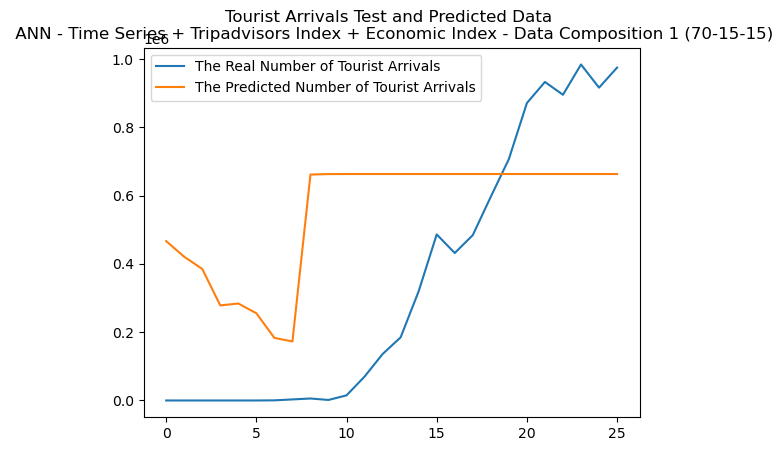

In [20]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label="The Real Number of Tourist Arrivals")
plt.plot(x_ax, y_pred, label="The Predicted Number of Tourist Arrivals")
plt.title("Tourist Arrivals Test and Predicted Data \n ANN - Time Series + Tripadvisors Index + Economic Index - Data Composition 1 (70-15-15)")
plt.legend()
plt.show()